### TThis notebook is to compare DIC, TA and DO for Match by Depth to Match by Salinity for the same dataset
#### Observation data were obtained from: https://www.ncei.noaa.gov/access/ocean-carbon-acidification-data-system/oceans/SalishCruise_DataPackage.html and
#### /ocean/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/KEY_MODEVAL/Datasets
Observation-model matches are from: beluga for 2015-2018, to compare with v202410D (Karyn's Eval, https://github.com/SalishSeaCast/analysis-karyn/blob/master/notebooks/Evaluations/OA_PugetSound_CarbonateChem_ModelObsPlots_v202410D_qualcontrol_matchbySalinity.ipynb)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from salishsea_tools import evaltools as et, viz_tools
import matplotlib as mpl
import cmocean
from collections import OrderedDict
import netCDF4 as nc
from matplotlib.colors import LogNorm

fs=14
mpl.rc('xtick', labelsize=fs)
mpl.rc('ytick', labelsize=fs)
mpl.rc('legend', fontsize=fs)
mpl.rc('axes', titlesize=fs)
mpl.rc('axes', labelsize=fs)
mpl.rc('figure', titlesize=fs)
mpl.rc('font', size=fs)
mpl.rc('font', family='sans-serif', weight='normal', style='normal')

%matplotlib inline

In [4]:
d15_202410D = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_byDepthKaryn_20150101_20151231.csv')
d16_202410D = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_byDepthKaryn_20160101_20161231.csv')
d17_202410D = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_byDepthKaryn_20170101_20171231.csv')
d18_202410D = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_byDepthKaryn_20180101_20181231.csv')
d15_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20150101_20151231.csv')
d16_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20160101_20161231.csv')
d17_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20170101_20171231.csv')
d18_202410 = pd.read_csv('/ocean/atall/MOAD/ObsModel/202410/ObsModel_202410b_bySalinityKaryn_20180101_20181231.csv')

data_202410D = pd.concat([d15_202410D, d16_202410D, d17_202410D, d18_202410D, # 202410v by depth
                       ], ignore_index=True)
data_202410 = pd.concat([d15_202410, d16_202410, d17_202410, d18_202410,  # 202410v by salinity
                       ], ignore_index=True)

In [5]:
data_202410D

,Unnamed: 0.2,Unnamed: 0.1,Cruise,dtUTC,Time,Lat,Lon,Z,Temp (degC),Temperature,...,obs_i,Year,Month,YMO,j,i,mod_vosaline,mod_votemper,mod_dissolved_oxygen,k
0,0,949,NaN,2015-04-01,NaN,48.6500,-123.5000,1.500,9.9160,10.045312,...,207.0,2015,4,2015-04-01,353,207,24.948086,11.210042,317.341919,1
1,1,950,NaN,2015-04-01,NaN,48.6500,-123.5000,6.500,9.0920,9.183276,...,207.0,2015,4,2015-04-01,353,207,28.695299,9.267448,241.395050,6
2,2,951,NaN,2015-04-01,NaN,48.6500,-123.5000,11.600,9.0630,9.152077,...,207.0,2015,4,2015-04-01,353,207,28.905107,9.174890,225.740936,11
3,3,952,NaN,2015-04-01,NaN,48.6500,-123.5000,21.800,9.0330,9.119351,...,207.0,2015,4,2015-04-01,353,207,29.191883,9.144765,219.343704,19
4,4,953,NaN,2015-04-01,NaN,48.6500,-123.5000,31.600,8.9640,9.044746,...,207.0,2015,4,2015-04-01,353,207,29.560349,9.166942,212.913712,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,1030,3659,NORSEMANIIOCT2018,2018-10-19,2:19:36,48.2728,-123.0193,50.522,9.3542,9.384381,...,NaN,2018,10,2018-10-01,247,231,32.370407,9.156926,130.729935,23
3627,1031,3658,NORSEMANIIOCT2018,2018-10-19,2:18:19,48.2728,-123.0193,80.431,8.4832,8.494975,...,NaN,2018,10,2018-10-01,247,231,33.049797,8.278183,105.565163,25
3628,1032,3664,NORSEMANIIOCT2018,2018-10-19,14:59:15,47.7028,-122.4535,80.542,11.8712,11.937513,...,NaN,2018,10,2018-10-01,97,244,30.931124,11.271900,157.867584,25
3629,1033,3657,NORSEMANIIOCT2018,2018-10-19,2:17:15,48.2728,-123.0193,104.412,8.3984,8.406372,...,NaN,2018,10,2018-10-01,247,231,33.062984,8.272382,105.470314,26


In [6]:
data_202410

,Unnamed: 0.2,Unnamed: 0.1,Cruise,dtUTC,Time,Lat,Lon,Z,Temp (degC),Temp (CT degC),...,Month,YMO,j,i,mod_dissolved_inorganic_carbon,mod_total_alkalinity,mod_dissolved_oxygen,mod_votemper,mod_vosaline,matched_salinity
0,0,949,NaN,2015-04-01,NaN,48.6500,-123.5000,1.500,9.9160,10.045312,...,4,2015-04-01,353,207,1849.958862,1992.091675,304.541443,9.754603,27.312281,27.312280
1,1,950,NaN,2015-04-01,NaN,48.6500,-123.5000,6.500,9.0920,9.183276,...,4,2015-04-01,353,207,1995.933472,2073.539307,221.543137,9.146894,29.082539,29.082539
2,2,951,NaN,2015-04-01,NaN,48.6500,-123.5000,11.600,9.0630,9.152077,...,4,2015-04-01,353,207,2002.387085,2079.002686,219.343704,9.144765,29.191883,29.191883
3,3,952,NaN,2015-04-01,NaN,48.6500,-123.5000,21.800,9.0330,9.119351,...,4,2015-04-01,353,207,2007.238403,2083.342041,217.948013,9.147735,29.278879,29.278880
4,4,953,NaN,2015-04-01,NaN,48.6500,-123.5000,31.600,8.9640,9.044746,...,4,2015-04-01,353,207,2023.362671,2097.147461,212.913712,9.166942,29.560349,29.560349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3626,1030,3659,NORSEMANIIOCT2018,2018-10-19,2:19:36,48.2728,-123.0193,50.522,9.3542,9.384381,...,10,2018-10-01,247,231,2219.648682,2255.978760,120.393791,8.789722,32.661236,32.661236
3627,1031,3658,NORSEMANIIOCT2018,2018-10-19,2:18:19,48.2728,-123.0193,80.431,8.4832,8.494975,...,10,2018-10-01,247,231,2247.499756,2275.685059,105.470314,8.272382,33.062984,33.062984
3628,1032,3664,NORSEMANIIOCT2018,2018-10-19,14:59:15,47.7028,-122.4535,80.542,11.8712,11.937513,...,10,2018-10-01,97,244,2089.909668,2169.147461,157.867584,11.271900,30.931124,30.931124
3629,1033,3657,NORSEMANIIOCT2018,2018-10-19,2:17:15,48.2728,-123.0193,104.412,8.3984,8.406372,...,10,2018-10-01,247,231,2247.499756,2275.685059,105.470314,8.272382,33.062984,33.062984


In [7]:
data_202410.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Cruise', 'dtUTC', 'Time', 'Lat', 'Lon',
       'Z', 'Temp (degC)', 'Temp (CT degC)', 'Sal (g kg-1)', 'Sal (PSS)',
       'DO (uM)', 'NO3 (uM)', 'NO2 (uM)', 'NH4 (uM)', 'PO4 (uM)', 'TA (uM)',
       'DIC (uM)', 'TA_FLAG', 'DIC_FLAG', 'Unnamed: 0', 'crid', 'ln', 'stn',
       'mon', 'day', 'dic', 'alk', 'OmegaA', 'obs_j', 'obs_i', 'Year', 'Month',
       'YMO', 'j', 'i', 'mod_dissolved_inorganic_carbon',
       'mod_total_alkalinity', 'mod_dissolved_oxygen', 'mod_votemper',
       'mod_vosaline', 'matched_salinity'],
      dtype='object')

### Create Salish Sea subregions based on Lat/Lon data

In [8]:
## Select data for only within the Central SoG
data_202410D.loc[((data_202410D['Lat'] >= 49.1)& (data_202410D['Lat'] < 49.5) & (data_202410D['Lon'] < -123.4) & (data_202410D['Lon'] > -124)),['broadregions']]='CSoG 202410D'
data_202410D.loc[((data_202410D['Lat'] >= 49.5)& (data_202410D['Lat'] < 50) & (data_202410D['Lon'] <= -124.5) & (data_202410D['Lon'] > -125)),['broadregions']]='NSoG 202410D'
data_202410D.loc[((data_202410D['Lat'] >= 48.2) & (data_202410D['Lat'] < 48.55) & (data_202410D['Lon'] <= -123.25) & (data_202410D['Lon'] > -124.5)),['broadregions']]='JdF 202410D'
data_202410D.loc[((data_202410D['Lat'] <= 47.9) & (data_202410D['Lat'] > 47.35) & (data_202410D['Lon'] < -122.65)),['broadregions']]='HC 202410D'

In [9]:
data_202410D.broadregions.unique()

array([nan, 'JdF 202410D', 'CSoG 202410D', 'NSoG 202410D', 'HC 202410D'],
      dtype=object)

In [10]:
data_202410.loc[((data_202410['Lat'] >= 49.1)& (data_202410['Lat'] < 49.5) & (data_202410['Lon'] < -123.4) & (data_202410['Lon'] > -124)),['broadregions']]='Central SoG 202410'
data_202410.loc[((data_202410['Lat'] >= 49.5)& (data_202410['Lat'] < 50) & (data_202410['Lon'] <= -124.5) & (data_202410['Lon'] > -125)),['broadregions']]='Northern SoG 202410'
data_202410.loc[((data_202410['Lat'] >= 48.2) & (data_202410['Lat'] < 48.55) & (data_202410['Lon'] <= -123.25) & (data_202410['Lon'] > -124.5)),['broadregions']]='JdF 202410'
data_202410.loc[((data_202410['Lat'] <= 47.9) & (data_202410['Lat'] > 47.35) & (data_202410['Lon'] < -122.65)),['broadregions']]='HC 202410'

In [11]:
data_202410.broadregions.unique()

array([nan, 'JdF 202410', 'Central SoG 202410', 'Northern SoG 202410',
       'HC 202410'], dtype=object)

In [12]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)
# define inverse log transform with same shift
def logt_inv(y):
    return 10**y-.001

In [13]:
CSoG24D=data_202410D.loc[data_202410D['broadregions']=='CSoG 202410D']
JdF24D=data_202410D.loc[data_202410D['broadregions']=='JdF 202410D']
NSoG24D=data_202410D.loc[data_202410D['broadregions']=='NSoG 202410D']
HC24D=data_202410D.loc[data_202410D['broadregions']=='HC 202410D']
CSoG24=data_202410.loc[data_202410['broadregions']=='CSoG 202410']
JdF24=data_202410.loc[data_202410['broadregions']=='JdF 202410']
NSoG24=data_202410.loc[data_202410['broadregions']=='NSoG 202410']
HC24=data_202410.loc[data_202410['broadregions']=='HC 202410']

In [14]:
DJF24D=data_202410D.loc[(data_202410D.Month==12)|(data_202410D.Month==1)|(data_202410D.Month==2)]
MAM24D=data_202410D.loc[(data_202410D.Month==3)|(data_202410D.Month==4)|(data_202410D.Month==5)]
JJA24D=data_202410D.loc[(data_202410D.Month==6)|(data_202410D.Month==7)|(data_202410D.Month==8)]
SON24D=data_202410D.loc[(data_202410D.Month==9)|(data_202410D.Month==10)|(data_202410D.Month==11)]
DJF24=data_202410.loc[(data_202410.Month==12)|(data_202410.Month==1)|(data_202410.Month==2)]
MAM24=data_202410.loc[(data_202410.Month==3)|(data_202410.Month==4)|(data_202410.Month==5)]
JJA24=data_202410.loc[(data_202410.Month==6)|(data_202410.Month==7)|(data_202410.Month==8)]
SON24=data_202410.loc[(data_202410.Month==9)|(data_202410.Month==10)|(data_202410.Month==11)]

In [15]:
cm1=cmocean.cm.thermal
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc') as bathy:
    bathylon=np.copy(bathy.variables['nav_lon'][:,:])
    bathylat=np.copy(bathy.variables['nav_lat'][:,:])
    bathyZ=np.copy(bathy.variables['Bathymetry'][:,:])

In [16]:
d24Dreg=dict()
for iregion in data_202410D.broadregions.dropna().unique():
    d24Dreg[iregion] = data_202410D.loc[data_202410D.broadregions==iregion]  
d24reg=dict()
for iregion in data_202410.broadregions.dropna().unique():
    d24reg[iregion] = data_202410.loc[data_202410.broadregions==iregion]  

In [17]:
statsubs24D=OrderedDict({'All':data_202410D,
                      'z < 25 m':data_202410D.loc[data_202410D.Z<25],
                      '25 m < z < 50 m':data_202410D.loc[(data_202410D.Z>=25)&(data_202410D.Z<50)],
                      '50 m < z < 150 m':data_202410D.loc[(data_202410D.Z>=50)&(data_202410D.Z<150)],
                      'z >= 150 m':data_202410D.loc[data_202410D.Z>=150],
                      'Winter':DJF24D,
                      'Spring':MAM24D,
                      'Summer':JJA24D,
                      'Fall': SON24D,})
for iregion in data_202410D.broadregions.dropna().unique():
    statsubs24D[iregion]=d24Dreg[iregion]
statsubs24D.keys()

odict_keys(['All', 'z < 25 m', '25 m < z < 50 m', '50 m < z < 150 m', 'z >= 150 m', 'Winter', 'Spring', 'Summer', 'Fall', 'JdF 202410D', 'CSoG 202410D', 'NSoG 202410D', 'HC 202410D'])

In [18]:
statsubs24=OrderedDict({'All':data_202410,
                      'z < 25 m':data_202410.loc[data_202410.Z<25],
                      '25 m < z < 50 m':data_202410.loc[(data_202410.Z>=25)&(data_202410.Z<50)],
                      '50 m < z < 150 m':data_202410.loc[(data_202410.Z>=50)&(data_202410.Z<150)],
                      'z >= 150 m':data_202410.loc[data_202410.Z>=150],
                      'Winter':DJF24,
                      'Spring':MAM24,
                      'Summer':JJA24,
                      'Fall': SON24,})
for iregion in data_202410.broadregions.dropna().unique():
    statsubs24[iregion]=d24reg[iregion]
statsubs24.keys()

odict_keys(['All', 'z < 25 m', '25 m < z < 50 m', '50 m < z < 150 m', 'z >= 150 m', 'Winter', 'Spring', 'Summer', 'Fall', 'JdF 202410', 'Central SoG 202410', 'Northern SoG 202410', 'HC 202410'])

In [19]:
def calc_stats(x, y):
    stats = {}
    MSE = np.mean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.mean(y) - np.mean(x)
    stats['WSS'] = 1 - MSE / np.mean((abs(y - np.mean(x)) + abs(x - np.mean(x)))**2)
    
    return stats


def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.3f} {units}\nbias = {stats['bias']:.3f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0.01, 0.8, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c

In [20]:
def byDepth24D(ax,obsvar,modvar,lims):
    SS=et.varvarPlot(ax,data_202410D,obsvar,modvar,'Z',(25,150),'z','m',('orange','darkturquoise','navy'))
    l=ax.legend(handles=SS)
    ax.set_xlabel('Observed Salinity (g kg-1)',fontsize=12)
    ax.set_ylabel('Matched Model Salinity (g kg-1)',fontsize=12)
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SS,l
def byDepth24(ax,obsvar,modvar,lims):
    SS=et.varvarPlot(ax,data_202410,obsvar,modvar,'Z',(25,150),'z','m',('orange','darkturquoise','navy'))
    l=ax.legend(handles=SS)
    ax.set_xlabel('Observed Salinity (g kg-1)',fontsize=12)
    ax.set_ylabel('Matched Model Salinity (g kg-1)',fontsize=12)
    ax.plot(lims,lims,'k-',alpha=.5)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    ax.set_aspect(1)
    return SS,l

In [35]:
def bySeason24D(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
    ax[0].set_ylabel('by Depth')
    SS=et.varvarPlot(ax[0],DJF24D,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    SS=et.varvarPlot(ax[1],MAM24D,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SS=et.varvarPlot(ax[2],JJA24D,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SS=et.varvarPlot(ax[3],SON24D,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 
def bySeason24(ax,obsvar,modvar,lims):
    for axi in ax:
        axi.plot(lims,lims,'k-')
        axi.set_xlim(lims)
        axi.set_ylim(lims)
        axi.set_aspect(1)
        axi.set_xlabel('Obs')
    ax[0].set_ylabel('by Salinity')
    SS=et.varvarPlot(ax[0],DJF24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[0].set_title('Winter')
    SS=et.varvarPlot(ax[1],MAM24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[1].set_title('Spring')
    SS=et.varvarPlot(ax[2],JJA24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[2].set_title('Summer')
    SS=et.varvarPlot(ax[3],SON24,obsvar,modvar,cols=('crimson','darkturquoise','navy'))
    ax[3].set_title('Autumn')
    return 

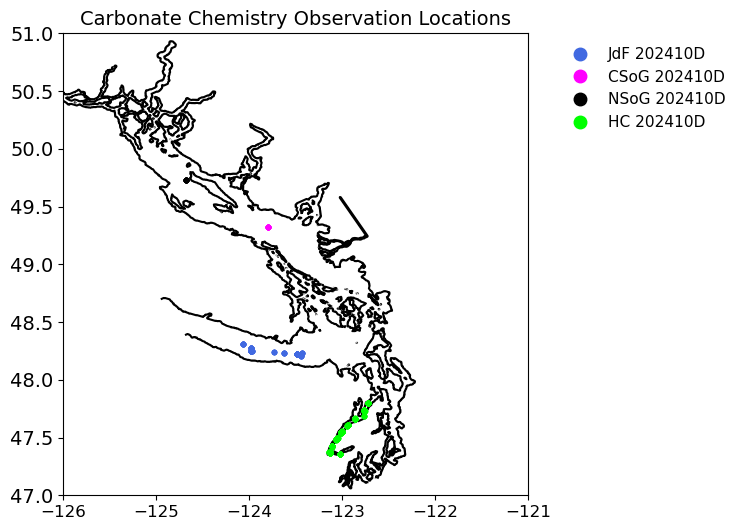

In [36]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1,color='k')
colors=('royalblue',
'fuchsia','black',
'lime','lightblue','mediumspringgreen',
'firebrick',
        'teal',

'darkviolet',
 'deepskyblue','darkgoldenrod',

'black','green','darkorange','deepskyblue','darkgreen','darkblue','slateblue','purple')
datreg=dict()
for ind, iregion in enumerate(data_202410D.broadregions.dropna().unique()):
    datreg[iregion] = data_202410D.loc[data_202410D.broadregions==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 51)
plt.yticks(fontsize=12);
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -121)
plt.xticks(fontsize=12);
ax.set_title('Carbonate Chemistry Observation Locations');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,markerscale=3.,fontsize=11)
#fig.savefig('SalishSeaObservationLocations.jpg',bbox_inches='tight')

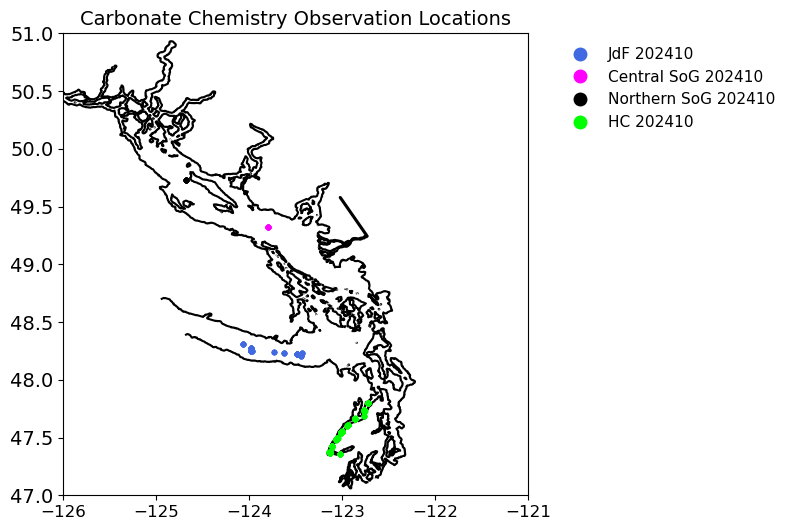

In [37]:
fig, ax = plt.subplots(1,1,figsize = (6,6))
with nc.Dataset('/ocean/ksuchy/MOAD/NEMO-forcing/grid/bathymetry_202108.nc') as grid:
    viz_tools.plot_coastline(ax, grid, coords = 'map',isobath=.1,color='k')
colors=('royalblue',
'fuchsia','black',
'lime','lightblue','mediumspringgreen',
'firebrick',
        'teal',

'darkviolet',
 'deepskyblue','darkgoldenrod',

'black','green','darkorange','deepskyblue','darkgreen','darkblue','slateblue','purple')
datreg=dict()
for ind, iregion in enumerate(data_202410.broadregions.dropna().unique()):
    datreg[iregion] = data_202410.loc[data_202410.broadregions==iregion]
    ax.plot(datreg[iregion]['Lon'], datreg[iregion]['Lat'],'.',
            color = colors[ind], label=iregion)
ax.set_ylim(47, 51)
plt.yticks(fontsize=12);
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend(bbox_to_anchor=[1,.6,0,0])
ax.set_xlim(-126, -121)
plt.xticks(fontsize=12);
ax.set_title('Carbonate Chemistry Observation Locations');
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False,markerscale=3.,fontsize=11)
#fig.savefig('SalishSeaObservationLocations.jpg',bbox_inches='tight')

#### Check plot of modelled salinity vs observed salinity matched by salinity

Text(0.5, 1.0, 'Salish Sea')

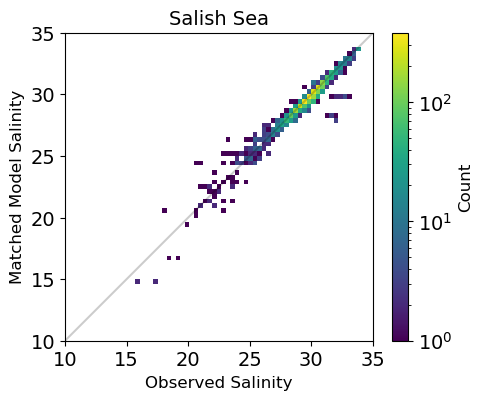

In [38]:
fig,ax=plt.subplots(1,1,figsize=(5,4))
ii=(~np.isnan(data_202410['Sal (g kg-1)']))&(~np.isnan(data_202410['mod_vosaline']))
counts, xedges, yedges, m1=ax.hist2d((data_202410.loc[ii,['Sal (g kg-1)']].values.flatten()+.001),
                                      (data_202410.loc[ii,['mod_vosaline']].values.flatten()+.001),bins=25*2,norm=LogNorm())

ax.plot((10,35),(10,35),'k-',alpha=.2)
cb=fig.colorbar(m1)#,cax=axcb
cb.set_label('Count',fontsize=12)
ax.set_xlim(10,35)
ax.set_ylim(10,35)
ax.set_aspect(1)
ax.set_ylabel('Matched Model Salinity',fontsize=12)
ax.set_xlabel('Observed Salinity',fontsize=12)
ax.set_title('Salish Sea')

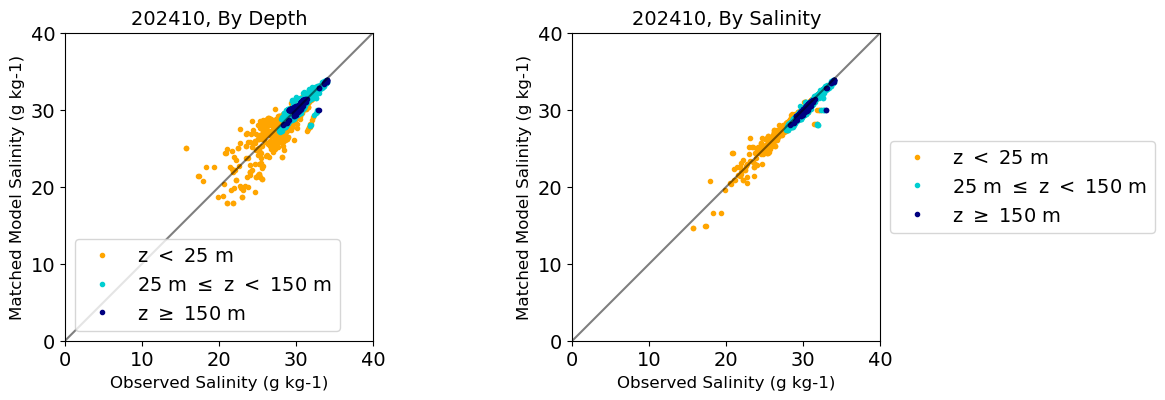

In [39]:
fig, ax = plt.subplots(1,2,figsize = (12,4))
SS,l=byDepth24D(ax[0],'Salinity','mod_vosaline',(0,40))
SS,l=byDepth24(ax[1],'Sal (g kg-1)','mod_vosaline',(0,40))
ax[0].set_title('202410, By Depth')
ax[1].set_title('202410, By Salinity')
ax[0].set_xlim(0,40)
ax[0].set_ylim(0,40)
ax[1].set_xlim(0,40)
ax[1].set_ylim(0,40)
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Take a look at some evaluations for DIC, Total Alkalinity, DO

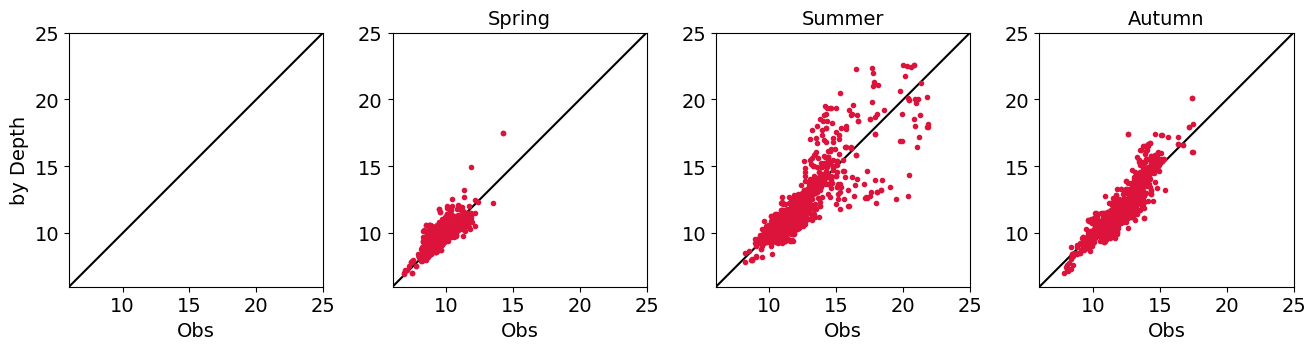

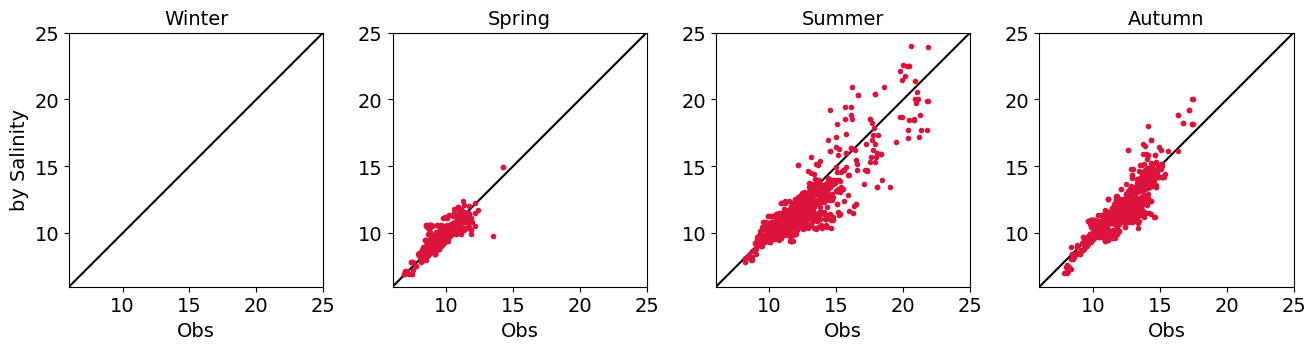

In [40]:
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24D(ax,'Temp (degC)','mod_votemper',(6,25))
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24(ax,'Temp (degC)','mod_votemper',(6,25))

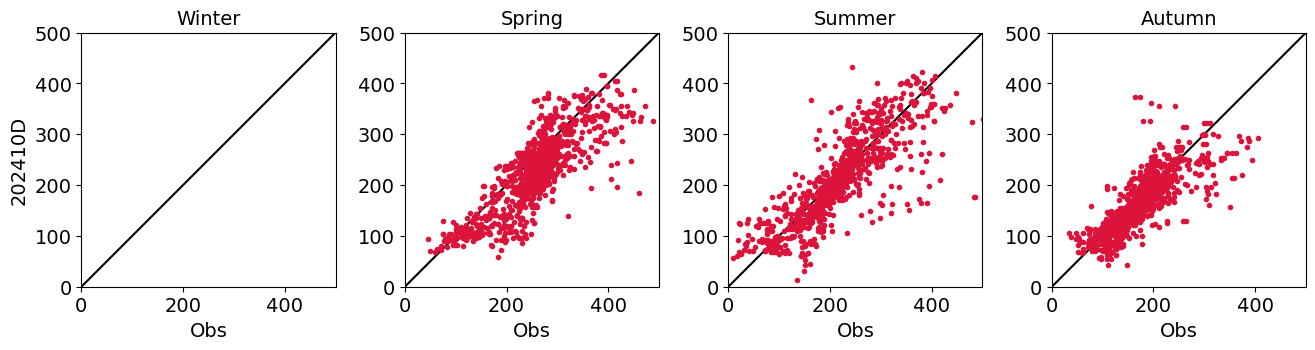

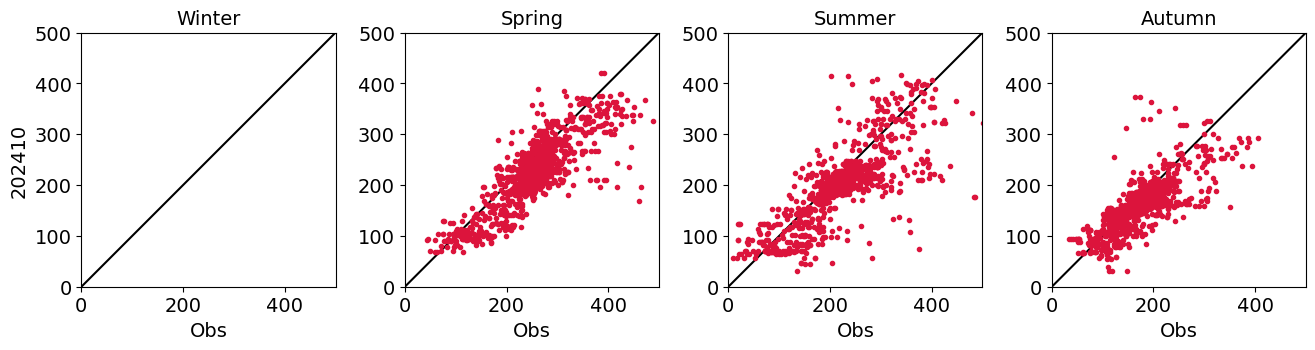

In [ ]:
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24D(ax,'Oxygen_Dissolved','mod_dissolved_oxygen',(0,500))
fig, ax = plt.subplots(1,4,figsize = (16,3.3))
bySeason24(ax,'DO (uM)','mod_dissolved_oxygen',(0,500))

Text(0.5, 1.0, '202410, DO matched by Salinity')

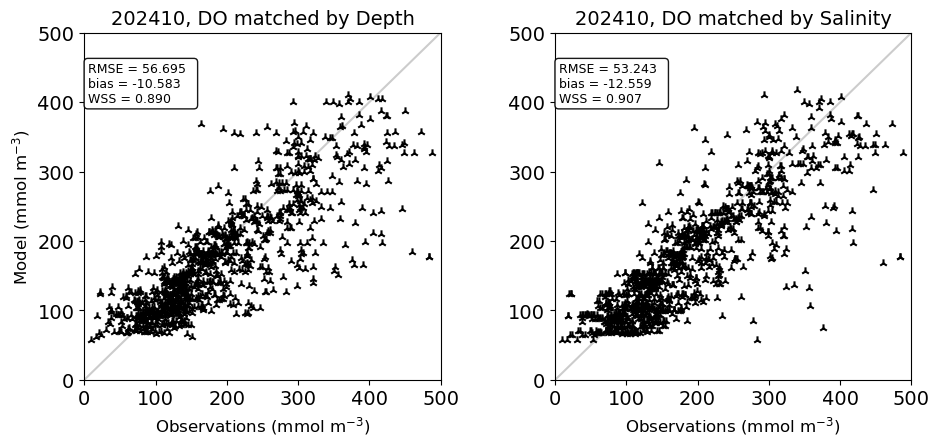

In [ ]:
#################################################### DO ################################################
fig, ax = plt.subplots(1,2,figsize = (10,5))
fig.tight_layout(pad=3)
ax[0].scatter((HC24D['Oxygen_Dissolved']),(HC24D['mod_dissolved_oxygen']),color='black',label='Hood Canal',marker='2',zorder=4)
ax[1].scatter((HC24['DO (uM)']),(HC24['mod_dissolved_oxygen']),color='black',label='Hood Canal',marker='2',zorder=4)
plot_panel(ax[0], HC24D['Oxygen_Dissolved'], HC24D['mod_dissolved_oxygen'], (0,500), ' ')
plot_panel(ax[1], HC24['DO (uM)'], HC24['mod_dissolved_oxygen'], (0,500), ' ')

ax[0].set_ylim(0,500)
ax[0].set_xlim(0,500)
ax[0].plot((0,500),(0,500),'k-',alpha=.2)
ax[0].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[0].set_ylabel('Model (mmol m$^{-3}$)',fontsize=12)
ax[0].set_title('202410, DO matched by Depth')
ax[1].set_ylim(0,500)
ax[1].set_xlim(0,500)
ax[1].plot((0,500),(0,500),'k-',alpha=.2)
ax[1].set_xlabel('Observations (mmol m$^{-3}$)',fontsize=12)
ax[1].set_title('202410, DO matched by Salinity')
#ax[0].legend(bbox_to_anchor=(1.1, 1.05))
#ax[1].legend()

In [ ]:
data_202410D.keys()

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Cruise', 'dtUTC', 'Time', 'Lat', 'Lon',
       'Z', 'Temp (degC)', 'Temperature', 'Salinity', 'Sal (PSS)',
       'Oxygen_Dissolved', 'N', 'NO2 (uM)', 'NH4 (uM)', 'PO4 (uM)', 'TA (uM)',
       'DIC (uM)', 'TA_FLAG', 'DIC_FLAG', 'Unnamed: 0', 'crid', 'ln', 'stn',
       'mon', 'day', 'dic', 'alk', 'OmegaA', 'obs_j', 'obs_i', 'Year', 'Month',
       'YMO', 'j', 'i', 'mod_vosaline', 'mod_votemper', 'mod_dissolved_oxygen',
       'k', 'broadregions'],
      dtype='object')